In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'client_id': [1, 10, 12, 43, 100],
              'sex': [0, 1, 1, 0, 1],
              'wealth': ['medium', 'heigh', 'low', 'heigh', 'low'],
              'age': [18, 45, 68, 55, 43]})

In [3]:
df.nunique()

client_id    5
sex          2
wealth       3
age          5
dtype: int64

In [4]:
data = pd.DataFrame({'client_id': [1, 10, 12, 43, 100],
                     'amount': [43234, 34634, 100324, 23455, 36645],
                     'date': [1585427761, 1585427734, 1585427767, 1585427865, 1585427754]})

In [5]:
data

,client_id,amount,date
0,1,43234,1585427761
1,10,34634,1585427734
2,12,100324,1585427767
3,43,23455,1585427865
4,100,36645,1585427754


In [6]:
full_data = df.merge(data, how='inner', on='client_id')

In [7]:
full_data

,client_id,sex,wealth,age,amount,date
0,1,0,medium,18,43234,1585427761
1,10,1,heigh,45,34634,1585427734
2,12,1,low,68,100324,1585427767
3,43,0,heigh,55,23455,1585427865
4,100,1,low,43,36645,1585427754


In [8]:
def read_n_agg(path_to_file):
    df = pd.read_csv(path_to_file, sep=';')
    return df.groupby('company', as_index=True)['income'].mean()


In [9]:
taxi_peru = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [10]:
taxi_peru.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [11]:
taxi_peru['source'].value_counts(normalize=True)

iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
Name: source, dtype: float64

<Axes: >

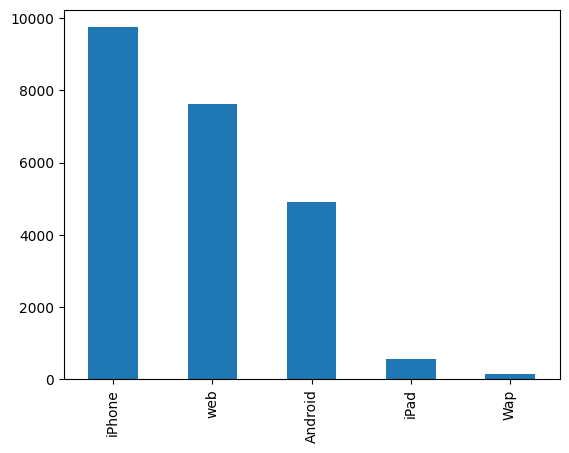

In [12]:
taxi_peru['source'].value_counts().plot(kind='bar')

<Axes: xlabel='icon', ylabel='count'>

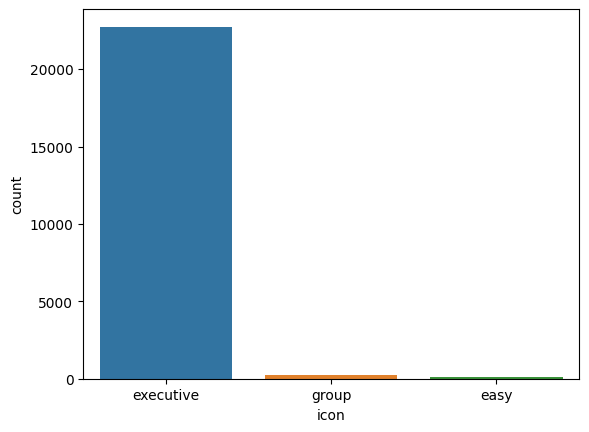

In [13]:
sns.countplot(x=taxi_peru['icon'])

<Axes: xlabel='source', ylabel='count'>

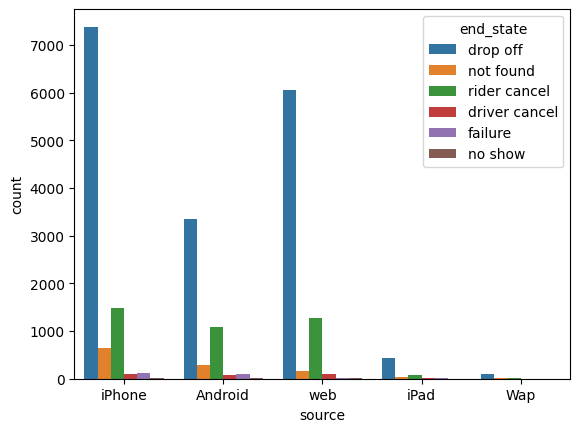

In [14]:
sns.countplot(x=taxi_peru['source'], hue=taxi_peru['end_state'])

In [15]:
driver_score_counts = (taxi_peru['driver_score'].value_counts(normalize=True)
.mul(100).round(2).reset_index()
.rename(columns={'index': 'driver_score', 'driver_score': 'percentage'})
.sort_values('driver_score'))

In [38]:
taxi_peru.value_counts('driver_score', normalize=True).mul(100).round(2).reset_index().rename(columns={0: 'percentage'}).sort_values('driver_score')

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [16]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


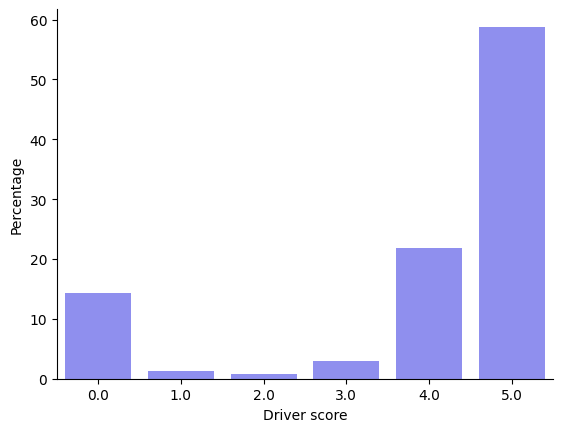

In [ ]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [ ]:
taxi_peru.head(1)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0


In [ ]:
rider_score_counts = (taxi_peru['rider_score'].value_counts(normalize=True)
.mul(100).round(2).reset_index()
.rename(columns={'index': 'rider_score', 'rider_score': 'percentage'})
.sort_values('rider_score'))

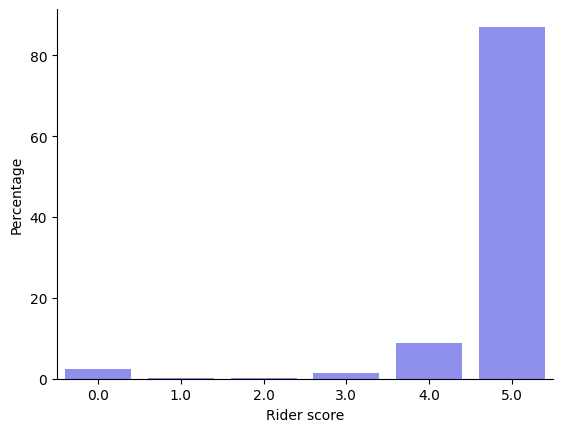

In [ ]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

# Минипроект

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [ ]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
logs['platform'].nunique()

3

In [ ]:
logs.query('success == 1').groupby('client', as_index=False).agg({'platform': 'count'}).sort_values('platform', ascending=False)

,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [ ]:
max_clients = (logs.query('success == 1')
.groupby('client', as_index=False)
.agg({'platform': 'count'})
.sort_values('platform', ascending=False)
.query('platform == 41')['client'].tolist())

sorted(max_clients)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
0 == False

True

In [ ]:
logs[logs['success'] == 1]['platform'].value_counts().idxmax()

In [ ]:
user_data.head(5)

In [ ]:
full_table = logs.merge(user_data, how='inner', on='client')

In [ ]:
full_table[full_table['premium'] == 1]['platform'].value_counts().idxmax()

In [ ]:
sns.distplot(full_table[full_table['premium'] == 0]['age'], kde=True)
sns.distplot(full_table[full_table['premium'] == 1]['age'], kde=True)


In [ ]:
sns.distplot(full_table.groupby('client').agg({'success': 'sum'}), kde=False)

In [ ]:
computer_success_age_rate = full_table.query('success == 1 and platform == "computer"')

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=computer_success_age_rate['age'], data=computer_success_age_rate)

In [ ]:
computer_success_age_rate